## Import Libraries and Dataframes 

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [5]:
# path variable 
path = r'C:\Users\jmiel\JENNY_STUFF\MY_DOCS\CareerFoundry\ClimateWins'

# Upload weather file
climate_cleaned = pd.read_csv(os.path.join(path, 'Data Sets', 'climate_cleaned.csv'))
climate_cleaned

Unnamed: 0  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0               0                  7            0.85          1.0180   
1               1                  6            0.84          1.0180   
2               2                  8            0.90          1.0180   
3               3                  3            0.92          1.0180   
4               4                  6            0.95          1.0180   
...           ...                ...             ...             ...   
22945       22945                  1            0.79          1.0248   
22946       22946                  6            0.77          1.0244   
22947       22947                  4            0.76          1.0227   
22948       22948                  5            0.80          1.0212   
22949       22949                  5            0.84          1.0193   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                        0.32                 0.09             0.7   
1                        0.36                 1.05             1.1   
2                        0.18                 0.30             0.0   
3                        0.58                 0.00             4.1   
4                        0.65                 0.14             5.4   
...                       ...                  ...             ...   
22945                    1.34                 0.22             7.7   
22946                    1.34                 0.22             5.4   
22947                    1.34                 0.22             6.1   
22948                    1.34                 0.22             5.8   
22949                    1.34                 0.22             3.2   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  ...  \
0                  6.5             0.8            10.9  ...   
1                  6.1             3.3            10.1  ...   
2                  8.5             5.1             9.9  ...   
3                  6.3             3.8            10.6  ...   
4                  3.0            -0.7             6.0  ...   
...                ...             ...             ...  ...   
22945             15.9            11.4            21.4  ...   
22946             16.7            14.3            21.9  ...   
22947             16.7            13.1            22.4  ...   
22948             15.4            11.6            21.1  ...   
22949             13.5             9.9            19.2  ...   

       STOCKHOLM_temp_max  VALENTIA_cloud_cover  VALENTIA_humidity  \
0                     4.9                     5               0.88   
1                     5.0                     7               0.91   
2                     4.1                     7               0.91   
3                     2.3                     7               0.86   
4                     4.3                     3               0.80   
...                   ...                   ...                ...   
22945                14.2                     5               0.82   
22946                14.3                     5               0.82   
22947                14.4                     5               0.82   
22948                12.4                     5               0.82   
22949                12.6                     5               0.82   

       VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
0                 1.0003                       0.45                    0.34   
1                 1.0007                       0.25                    0.84   
2                 1.0096                       0.17                    0.08   
3                 1.0184                       0.13                    0.98   
4                 1.0328                       0.46                    0.00   
...                  ...                        ...                     ...   
22945             1.0142                       1.13                    0.41   
22946             1.0142                       1.13                    

In [6]:
climate_cleaned = climate_cleaned.drop('Unnamed: 0', axis =1)

In [7]:
climate_cleaned

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0                      7            0.85          1.0180   
1                      6            0.84          1.0180   
2                      8            0.90          1.0180   
3                      3            0.92          1.0180   
4                      6            0.95          1.0180   
...                  ...             ...             ...   
22945                  1            0.79          1.0248   
22946                  6            0.77          1.0244   
22947                  4            0.76          1.0227   
22948                  5            0.80          1.0212   
22949                  5            0.84          1.0193   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                        0.32                 0.09             0.7   
1                        0.36                 1.05             1.1   
2                        0.18                 0.30             0.0   
3                        0.58                 0.00             4.1   
4                        0.65                 0.14             5.4   
...                       ...                  ...             ...   
22945                    1.34                 0.22             7.7   
22946                    1.34                 0.22             5.4   
22947                    1.34                 0.22             6.1   
22948                    1.34                 0.22             5.8   
22949                    1.34                 0.22             3.2   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
0                  6.5             0.8            10.9                     1   
1                  6.1             3.3            10.1                     6   
2                  8.5             5.1             9.9                     6   
3                  6.3             3.8            10.6                     8   
4                  3.0            -0.7             6.0                     8   
...                ...             ...             ...                   ...   
22945             15.9            11.4            21.4                     2   
22946             16.7            14.3            21.9                     0   
22947             16.7            13.1            22.4                     2   
22948             15.4            11.6            21.1                     1   
22949             13.5             9.9            19.2                     4   

       ...  STOCKHOLM_temp_max  VALENTIA_cloud_cover  VALENTIA_humidity  \
0      ...                 4.9                     5               0.88   
1      ...                 5.0                     7               0.91   
2      ...                 4.1                     7               0.91   
3      ...                 2.3                     7               0.86   
4      ...                 4.3                     3               0.80   
...    ...                 ...                   ...                ...   
22945  ...                14.2                     5               0.82   
22946  ...                14.3                     5               0.82   
22947  ...                14.4                     5               0.82   
22948  ...                12.4                     5               0.82   
22949  ...                12.6                     5               0.82   

       VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
0                 1.0003                       0.45                    0.34   
1                 1.0007                       0.25                    0.84   
2                 1.0096                       0.17                    0.08   
3                 1.0184                       0.13                    0.98   
4                 1.0328                       0.46                    0.00   
...                  ...                        ...                     ...   
22945             1.0142      

In [8]:
pleasant_weather = pd.read_csv(os.path.join(path, 'Data Sets', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
pleasant_weather

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0      19600101                       0                          0   
1      19600102                       0                          0   
2      19600103                       0                          0   
3      19600104                       0                          0   
4      19600105                       0                          0   
...         ...                     ...                        ...   
22945  20221027                       0                          0   
22946  20221028                       0                          0   
22947  20221029                       0                          0   
22948  20221030                       0                          0   
22949  20221031                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   
...                          ...                      ...   
22945                          0                        0   
22946                          0                        0   
22947                          0                        0   
22948                          0                        0   
22949                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                                0                          0   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   
...                            ...                        ...   
22945                            0                          0   
22946                            0                          0   
22947                            0                          0   
22948                            0                          0   
22949                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
...                        ...                         ...   
22945                        0                           0   
22946                        0                           0   
22947                        0                           0   
22948                        0                           0   
22949                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   
...                            ...                      ...   
22945                            0                        0   
22946                            0                        0   
22947                            0                        0   
22948                            0                        0   
22949                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                              0                      0   
1                              0    

In [9]:
climate =  pd.read_csv(os.path.join(path, 'Data Sets', 'Dataset-weather-prediction-dataset-processed.csv'))

In [10]:
#Combine date and cleaned data
climate_date = pd.concat([climate['DATE'],climate_cleaned], axis=1)
climate_date

DATE  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0      19600101                  7            0.85          1.0180   
1      19600102                  6            0.84          1.0180   
2      19600103                  8            0.90          1.0180   
3      19600104                  3            0.92          1.0180   
4      19600105                  6            0.95          1.0180   
...         ...                ...             ...             ...   
22945  20221027                  1            0.79          1.0248   
22946  20221028                  6            0.77          1.0244   
22947  20221029                  4            0.76          1.0227   
22948  20221030                  5            0.80          1.0212   
22949  20221031                  5            0.84          1.0193   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                        0.32                 0.09             0.7   
1                        0.36                 1.05             1.1   
2                        0.18                 0.30             0.0   
3                        0.58                 0.00             4.1   
4                        0.65                 0.14             5.4   
...                       ...                  ...             ...   
22945                    1.34                 0.22             7.7   
22946                    1.34                 0.22             5.4   
22947                    1.34                 0.22             6.1   
22948                    1.34                 0.22             5.8   
22949                    1.34                 0.22             3.2   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  ...  \
0                  6.5             0.8            10.9  ...   
1                  6.1             3.3            10.1  ...   
2                  8.5             5.1             9.9  ...   
3                  6.3             3.8            10.6  ...   
4                  3.0            -0.7             6.0  ...   
...                ...             ...             ...  ...   
22945             15.9            11.4            21.4  ...   
22946             16.7            14.3            21.9  ...   
22947             16.7            13.1            22.4  ...   
22948             15.4            11.6            21.1  ...   
22949             13.5             9.9            19.2  ...   

       STOCKHOLM_temp_max  VALENTIA_cloud_cover  VALENTIA_humidity  \
0                     4.9                     5               0.88   
1                     5.0                     7               0.91   
2                     4.1                     7               0.91   
3                     2.3                     7               0.86   
4                     4.3                     3               0.80   
...                   ...                   ...                ...   
22945                14.2                     5               0.82   
22946                14.3                     5               0.82   
22947                14.4                     5               0.82   
22948                12.4                     5               0.82   
22949                12.6                     5               0.82   

       VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
0                 1.0003                       0.45                    0.34   
1                 1.0007                       0.25                    0.84   
2                 1.0096                       0.17                    0.08   
3                 1.0184                       0.13                    0.98   
4                 1.0328                       0.46                    0.00   
...                  ...                        ...                     ...   
22945             1.0142                       1.13                    0.41   
22946             1.0142                       1.13                    0.41   
22947             1.

In [11]:
# Create a new variable to extract 1990-1999 temperatures
# Create a condition where the date column starts with 201. In order to do this, convert the date value to a string
decade_weather = climate_date[climate_date['DATE'].astype('str').str.startswith('199')]

In [12]:
decade_weather =  decade_weather.drop(columns=['DATE'])
decade_weather

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
10958                  0            0.83          1.0217   
10959                  2            0.84          1.0238   
10960                  8            0.89          1.0231   
10961                  2            0.77          1.0265   
10962                  7            0.81          1.0286   
...                  ...             ...             ...   
14605                  7            0.74          0.9953   
14606                  8            0.88          0.9956   
14607                  8            0.84          1.0162   
14608                  7            0.80          1.0276   
14609                  7            0.86          1.0252   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
10958                    0.60                 0.00             7.2   
10959                    0.48                 0.00             2.3   
10960                    0.20                 0.00             0.0   
10961                    0.54                 0.00             5.6   
10962                    0.23                 0.04             0.2   
...                       ...                  ...             ...   
14605                    0.28                 1.93             1.0   
14606                    0.13                 1.22             0.0   
14607                    0.21                 0.11             0.1   
14608                    0.26                 0.01             0.5   
14609                    0.21                 0.09             0.0   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
10958             -2.1            -3.6             1.2                     2   
10959             -1.8            -3.9             1.7                     8   
10960             -2.2            -4.2             0.4                     5   
10961             -0.7            -3.1             2.2                     5   
10962              0.0            -3.1             2.6                     0   
...                ...             ...             ...                   ...   
14605              5.0             1.5             6.5                     5   
14606              2.4             1.0             3.4                     8   
14607              1.8             1.0             2.7                     6   
14608              1.1            -0.3             3.4                     3   
14609              0.7            -0.7             1.9                     7   

       ...  STOCKHOLM_temp_max  VALENTIA_cloud_cover  VALENTIA_humidity  \
10958  ...                -0.3                     3               0.82   
10959  ...                -3.4                     5               0.79   
10960  ...                -2.6                     4               0.90   
10961  ...                 0.5                     6               0.93   
10962  ...                 0.8                     4               0.91   
...    ...                 ...                   ...                ...   
14605  ...                 1.6                     7               0.75   
14606  ...                 1.0                     3               0.73   
14607  ...                -1.1                     5               0.81   
14608  ...                -2.5                     8               0.94   
14609  ...                -7.0                     6               0.94   

       VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
10958             1.0068                       0.20                    0.51   
10959             1.0040                       0.21                    1.48   
10960             1.0094                       0.38                    0.00   
10961             1.0112                       0.13                    0.92   
10962             1.0108                       0.20                    0.56   
...                  ...                        ...                     ...   
14605             0.9954      

## Random Forest 1990's

In [14]:
# Filter pleasant dataset to 1990s
pleasant_1990s = pleasant_weather[pleasant_weather['DATE'].astype(str).str.startswith('199')] 
pleasant_1990s.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
10958  19900101                       0                          0   
10959  19900102                       0                          0   
10960  19900103                       0                          0   
10961  19900104                       0                          0   
10962  19900105                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
10958                          0                        0   
10959                          0                        0   
10960                          0                        0   
10961                          0                        0   
10962                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
10958                            0                          0   
10959                            0                          0   
10960                            0                          0   
10961                            0                          0   
10962                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
10958                        0                           0   
10959                        0                           0   
10960                        0                           0   
10961                        0                           0   
10962                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
10958                            0                        0   
10959                            0                        0   
10960                            0                        0   
10961                            0                        0   
10962                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
10958                          0                      0   
10959                          0                      0   
10960                          0                      0   
10961                          0                      0   
10962                          0                      0   

       SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
10958                           0                           0   
10959                           0                           0   
10960                           0                           0   
10961                           0                           0   
10962                           0                           0   

       VALENTIA_pleasant_weather  
10958                          0  
10959                          0  
10960                          0  
10961                          0  
10962                          0

In [15]:
# Drop 'DATE' column from 1990s pleasant dataset
pleasant_1990s = pleasant_1990s.drop(columns=['DATE'])

# Check shape
pleasant_1990s.shape

(3652, 15)

In [16]:
X = decade_weather.to_numpy()
y = pleasant_1990s

In [17]:
y.shape

(3652, 15)

In [18]:
# Create matrices -- combine 15 columns in pleasant weather data into single column
y = y.max(axis=1)
print("Shape of y_combined:", y.shape)

Shape of y_combined: (3652,)


In [19]:
# Ensure y has the correct shape
y = y.to_numpy().reshape(-1)

In [20]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [21]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2921, 135) (2921,)
(731, 135) (731,)


In [22]:
# Creating a Random Forest classifier
clf = RandomForestClassifier(n_estimators = 100, max_depth=10)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [23]:
# Perform the predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.9548563611491108


[Text(0.6051682692307693, 0.9545454545454546, 'x[125] <= 8.25\ngini = 0.474\nsamples = 1867\nvalue = [1125, 1796]\nclass = pleasant'),
 Text(0.4227163461538462, 0.8636363636363636, 'x[129] <= 1.04\ngini = 0.321\nsamples = 866\nvalue = [1033, 260]\nclass = unpleasant'),
 Text(0.2685096153846154, 0.7727272727272727, 'x[15] <= 8.95\ngini = 0.246\nsamples = 765\nvalue = [979, 164]\nclass = unpleasant'),
 Text(0.17451923076923076, 0.6818181818181818, 'x[120] <= 1.01\ngini = 0.115\nsamples = 614\nvalue = [872, 57]\nclass = unpleasant'),
 Text(0.11826923076923077, 0.5909090909090909, 'x[48] <= 1.655\ngini = 0.064\nsamples = 585\nvalue = [850, 29]\nclass = unpleasant'),
 Text(0.11057692307692307, 0.5, 'x[132] <= 11.35\ngini = 0.056\nsamples = 583\nvalue = [850, 25]\nclass = unpleasant'),
 Text(0.0673076923076923, 0.4090909090909091, 'x[50] <= 6.55\ngini = 0.032\nsamples = 526\nvalue = [781, 13]\nclass = unpleasant'),
 Text(0.03461538461538462, 0.3181818181818182, 'x[1] <= 0.685\ngini = 0.022\n

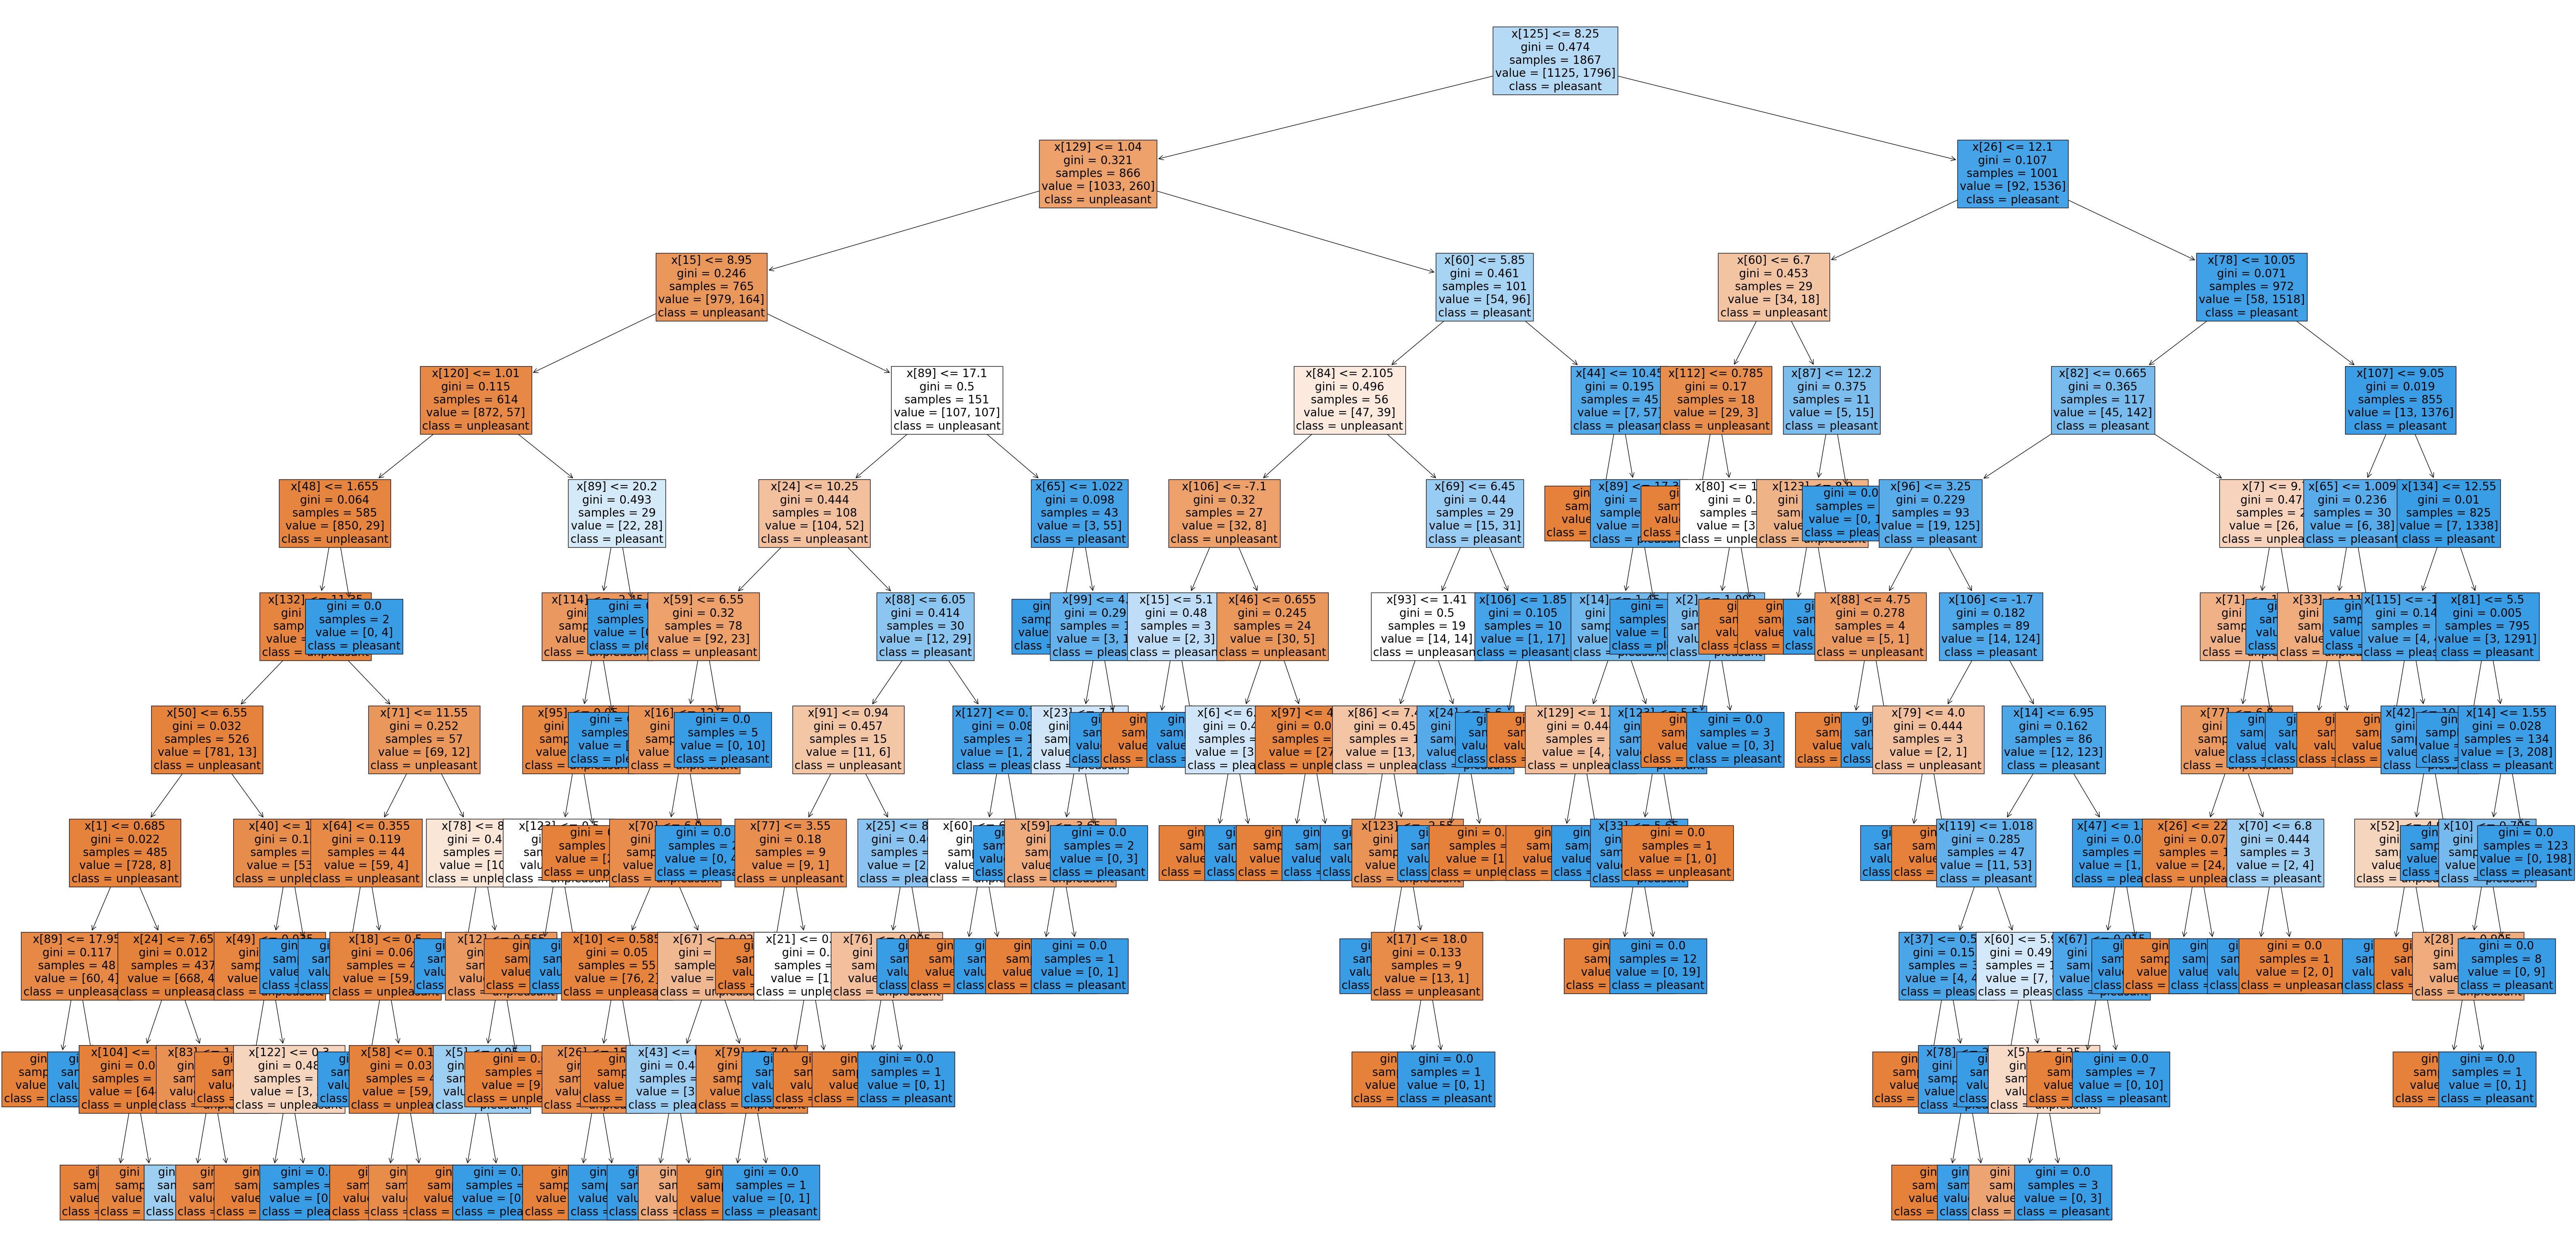

In [24]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, class_names=['unpleasant', 'pleasant'], filled=True)

## Feature Importance 1990's 

In [26]:
# Retrieve feature importances from the trained model
feature_importances = clf.feature_importances_
print("Feature Importances:", feature_importances)
print(feature_importances.shape)

Feature Importances: [0.00069748 0.00097403 0.0012001  0.00347104 0.00089439 0.0004857
 0.01297705 0.00655213 0.00405172 0.00118632 0.00391477 0.00125393
 0.00674036 0.00334536 0.0026685  0.0252588  0.01457131 0.01474203
 0.00067724 0.00125133 0.0014809  0.00354632 0.00121786 0.00139545
 0.0328367  0.00532004 0.06742894 0.00071524 0.00097525 0.00115177
 0.00496755 0.00081032 0.00079778 0.00143862 0.00119386 0.00451634
 0.00061689 0.00077629 0.00108611 0.00248101 0.0007151  0.00097401
 0.01241328 0.00176143 0.02651481 0.00048796 0.00100189 0.00100047
 0.00859361 0.00069097 0.0009395  0.013145   0.00168382 0.00774335
 0.00057743 0.00088403 0.00122085 0.00247554 0.00049038 0.00085806
 0.03343611 0.00172516 0.03888276 0.00022563 0.00220617 0.00113569
 0.0051438  0.00106897 0.00144557 0.03890534 0.00371785 0.0630501
 0.00023141 0.00099943 0.00099349 0.00211242 0.00048511 0.00089554
 0.00919613 0.00560564 0.0209085  0.00162062 0.00397366 0.0017687
 0.01080348 0.00233564 0.00526456 0.07047155

In [27]:
# Reshape the feature importances to (-1, 15, 9)
reshaped_importances = feature_importances.reshape(-1, 15, 9)

# Check shape
print("Reshaped Importances Shape:", reshaped_importances.shape)

Reshaped Importances Shape: (1, 15, 9)


In [28]:
# Sum the values across the last dimension to get one observation for each weather station
collapsed_importances = np.sum(reshaped_importances[0], axis=1)

# Check shape
print("Collapsed Importances Shape:", collapsed_importances.shape)
print("Collapsed Importances:", collapsed_importances)

Collapsed Importances Shape: (15,)
Collapsed Importances: [0.03130363 0.07368138 0.11515478 0.01656672 0.04733893 0.03528655
 0.08055031 0.11689912 0.04142767 0.21698659 0.06581928 0.06481582
 0.0105908  0.06589201 0.0176864 ]


In [29]:
# Create list for weather stations
weather_stations = ['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 
                    'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 
                    'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']

In [30]:
# Create a dataframe to associate weather stations with their importances
collapsed_importances_1990s = pd.DataFrame({
    'Weather Station': weather_stations,
    'Importance': collapsed_importances
})

In [31]:
# Sort by importance for chart readability
collapsed_importances_1990s = collapsed_importances_1990s.sort_values(by='Importance', ascending=False)
print("Collapsed Feature Importances:")
print(collapsed_importances_1990s)

Collapsed Feature Importances:
   Weather Station  Importance
9           MADRID    0.216987
7        LJUBLJANA    0.116899
2         BUDAPEST    0.115155
6           KASSEL    0.080550
1         BELGRADE    0.073681
13       STOCKHOLM    0.065892
10        MUNCHENB    0.065819
11            OSLO    0.064816
4       DUSSELDORF    0.047339
8       MAASTRICHT    0.041428
5         HEATHROW    0.035287
0            BASEL    0.031304
14        VALENTIA    0.017686
3           DEBILT    0.016567
12       SONNBLICK    0.010591


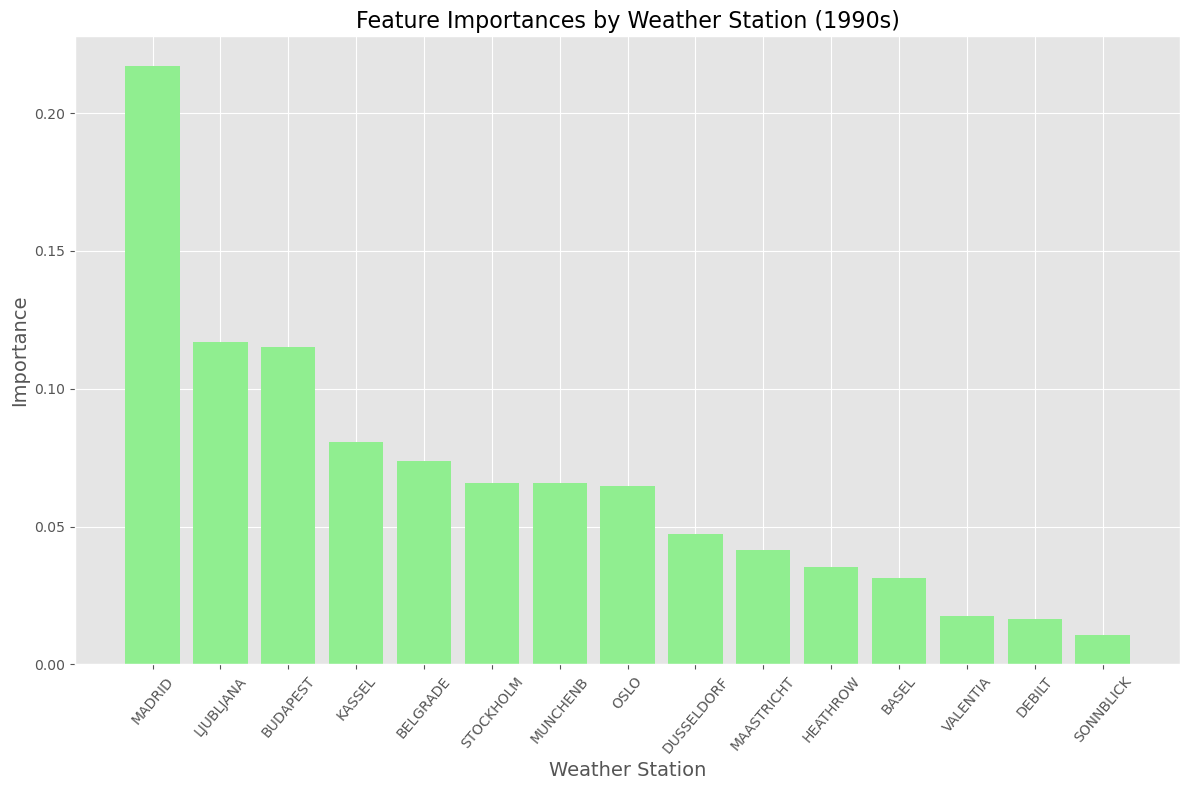

In [32]:
# Plot the importances

plt.style.use('ggplot')
plt_1 = plt.figure(figsize=(12, 8))
plt.bar(collapsed_importances_1990s['Weather Station'], collapsed_importances_1990s['Importance'], color='lightgreen')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Weather Station', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importances by Weather Station (1990s)', fontsize=16)
plt.tight_layout()
plt.show()

## Random Forest Model for Madrid

In [34]:
# Filter weather dataset to only include Madrid
df_madrid = climate_cleaned[climate_cleaned.columns[climate_cleaned.columns.astype(str).str.startswith('MADRID')]]

# Check output
df_madrid.head()

MADRID_cloud_cover  MADRID_humidity  MADRID_pressure  \
0                   6             0.92           1.0260   
1                   7             0.86           1.0254   
2                   5             0.90           1.0287   
3                   0             0.75           1.0281   
4                   2             0.64           1.0269   

   MADRID_global_radiation  MADRID_precipitation  MADRID_sunshine  \
0                     0.53                   0.0              1.4   
1                     0.46                   0.0              0.9   
2                     0.63                   0.0              2.3   
3                     1.16                   0.0              8.7   
4                     1.10                   0.0              7.8   

   MADRID_temp_mean  MADRID_temp_min  MADRID_temp_max  
0               7.6              4.4             10.8  
1               9.8              7.4             12.2  
2               8.6              6.4             10.8  
3              10.3              4.5             16.1  
4              12.1              8.2             16.0

In [35]:
# Filter pleasant dataset to only include Madrid
pleasant_madrid = pleasant_weather[pleasant_weather.columns[pleasant_weather.columns.astype(str).str.startswith('MADRID')]]

# Check output
pleasant_madrid.head()

MADRID_pleasant_weather
0                        0
1                        0
2                        0
3                        0
4                        0

In [36]:
# Check shape
print(df_madrid.shape)
print(pleasant_madrid.shape)

(22950, 9)
(22950, 1)


In [37]:
# Create matrices
y_2 = pleasant_madrid.max(axis=1)

# Check shape
print("Shape of y_2_combined:", y_2.shape)

Shape of y_2_combined: (22950,)


In [38]:
# Create X matrix
X_2 = df_madrid.to_numpy()

# Check shapes of the matrices
print(X_2.shape)
print(y_2.shape)

(22950, 9)
(22950,)


In [39]:
# Split data into training and testing sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, random_state=127)

# Check shapes
print(X_train_2.shape, y_train_2.shape)
print(X_test_2.shape, y_test_2.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [40]:
# Creating a Random Forest classifier
clf_2 = RandomForestClassifier(n_estimators = 100, max_depth=10)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_2.fit(X_train_2, y_train_2)

RandomForestClassifier(max_depth=10)

In [41]:
# Perform the predictions on the test dataset
y_pred_2 = clf_2.predict(X_test_2)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_2, y_pred_2))

Model Accuracy:  1.0


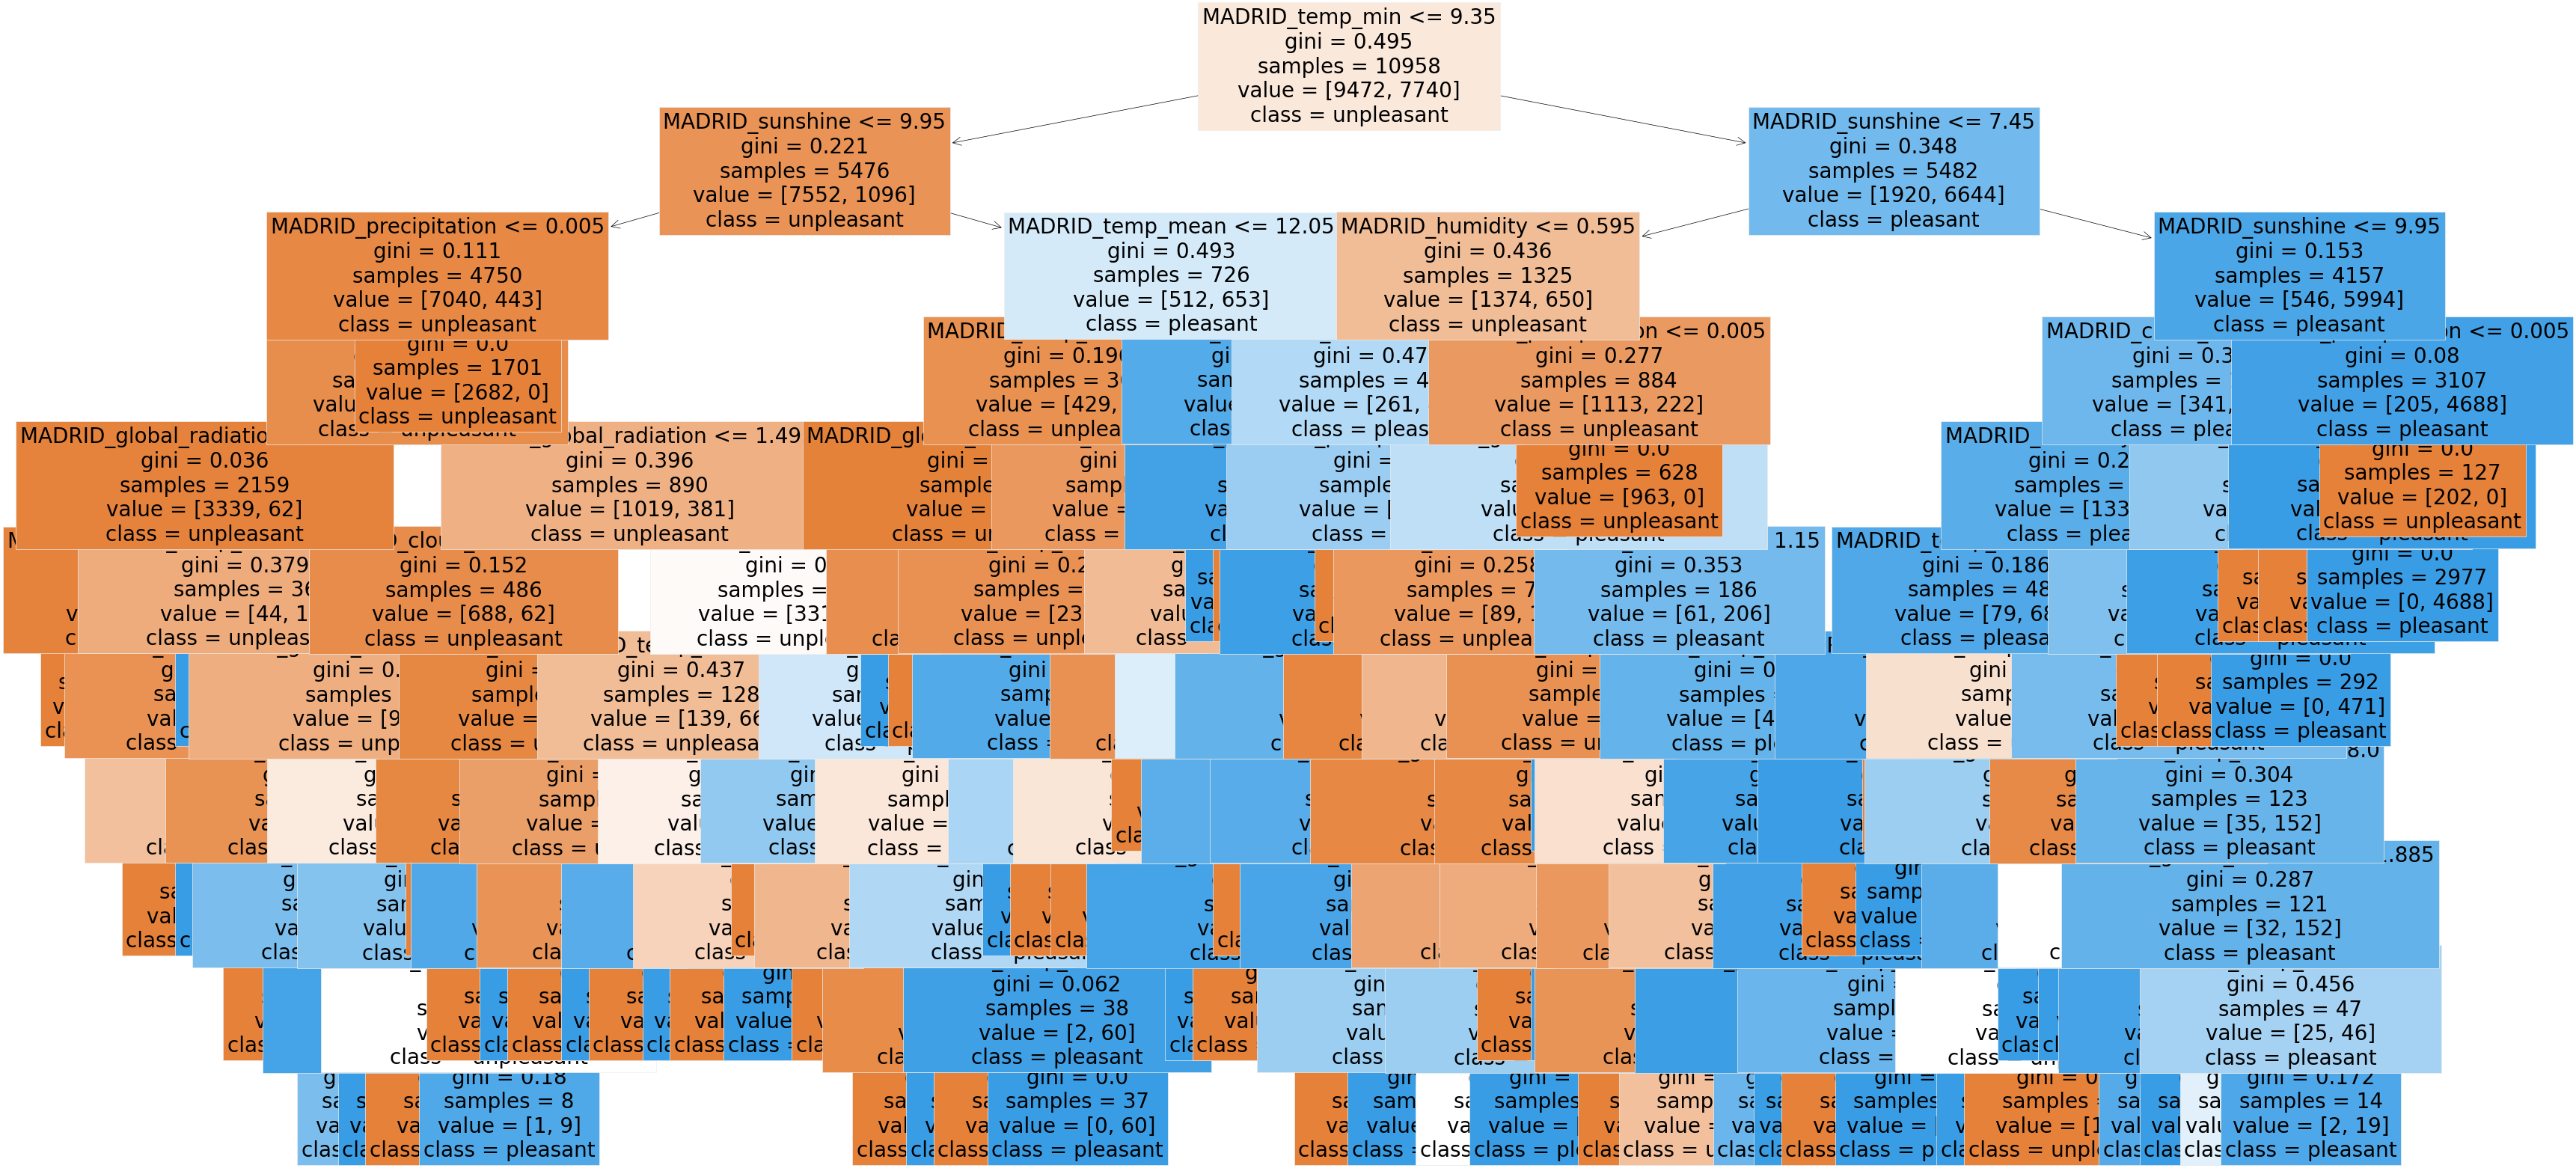

In [42]:
# Plot random forest (Madrid)
rf_2 = plt.figure(figsize=(40,20))
plot_tree(clf_2.estimators_[5], fontsize = 20, feature_names=df_madrid.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

#### Feature Importances for Madrid 

In [44]:
# Retrieve feature importances from the trained model
feature_importances_2 = clf_2.feature_importances_
print("Feature Importances:", feature_importances_2)
print(feature_importances_2.shape)

Feature Importances: [0.01415025 0.02269687 0.00396073 0.08632888 0.21105882 0.06608267
 0.1613651  0.0547406  0.37961608]
(9,)


In [45]:
# Create list for observation measurements
measurements = [
    'cloud_cover', 'humidity', 'pressure', 'global_radiation', 
    'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max'
]

In [46]:
# Create a dataframe to associate observation measurements with their importances
importances_df_2 = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importances_2
})

In [47]:
# Sort by importance for chart readability
importances_df_2 = importances_df_2.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importances_df_2)

Feature Importance:
        Measurement  Importance
8          temp_max    0.379616
4     precipitation    0.211059
6         temp_mean    0.161365
3  global_radiation    0.086329
5          sunshine    0.066083
7          temp_min    0.054741
1          humidity    0.022697
0       cloud_cover    0.014150
2          pressure    0.003961


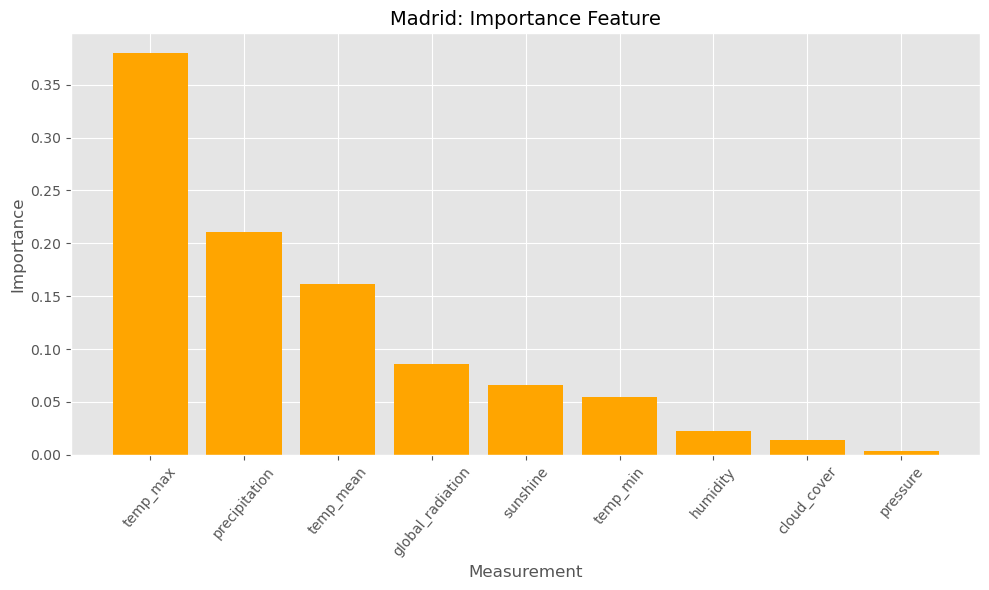

In [48]:
# Plot the importances

plt.style.use('ggplot')
plt_2 = plt.figure(figsize=(10, 6))
plt.bar(importances_df_2['Measurement'], importances_df_2['Importance'], color='orange')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Madrid: Importance Feature", fontsize=14)
plt.tight_layout()
plt.show()

## Random Forest Model for Ljubljana

In [50]:
# Filter weather dataset to only include Ljubljana
df_ljubljana = climate_cleaned[climate_cleaned.columns[climate_cleaned.columns.astype(str).str.startswith('LJUBLJANA')]]

# Check output
df_ljubljana.head()

LJUBLJANA_cloud_cover  LJUBLJANA_humidity  LJUBLJANA_pressure  \
0                      8                1.00              1.0173   
1                      6                0.94              1.0173   
2                      8                0.96              1.0173   
3                      6                0.94              1.0173   
4                      7                0.94              1.0173   

   LJUBLJANA_global_radiation  LJUBLJANA_precipitation  LJUBLJANA_sunshine  \
0                        0.20                     0.00                 0.0   
1                        0.56                     0.13                 3.2   
2                        0.20                     0.12                 0.0   
3                        0.49                     0.00                 2.2   
4                        0.20                     0.00                 0.0   

   LJUBLJANA_temp_mean  LJUBLJANA_temp_min  LJUBLJANA_temp_max  
0                 -0.6                -1.9                 0.5  
1                  2.1                -1.3                 5.5  
2                  4.6                 0.9                 6.3  
3                  3.2                 1.0                 7.0  
4                  3.6                 0.4                 4.8

In [51]:
# Filter pleasant dataset to only include Madrid
pleasant_ljubljana = pleasant_weather[pleasant_weather.columns[pleasant_weather.columns.astype(str).str.startswith('LJUBLJANA')]]

# Check output
pleasant_ljubljana.head()

LJUBLJANA_pleasant_weather
0                           0
1                           0
2                           0
3                           0
4                           0

In [52]:
# Check shape
print(df_ljubljana.shape)
print(pleasant_ljubljana.shape)

(22950, 9)
(22950, 1)


In [53]:
# Create matrices
y_3 = pleasant_ljubljana.max(axis=1)

# Check shape
print("Shape of y_3_combined:", y_3.shape)

Shape of y_3_combined: (22950,)


In [54]:
# Create X matrix
X_3 = df_ljubljana.to_numpy()

# Check shapes of the matrices
print(X_3.shape)
print(y_3.shape)

(22950, 9)
(22950,)


In [55]:
# Split data into training and testing sets
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, random_state=127)

# Check shapes
print(X_train_3.shape, y_train_3.shape)
print(X_test_3.shape, y_test_3.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [56]:
# Creating a Random Forest classifier
clf_3 = RandomForestClassifier(n_estimators = 100, max_depth=10)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_3.fit(X_train_3, y_train_3)

RandomForestClassifier(max_depth=10)

In [57]:
# Perform the predictions on the test dataset
y_pred_3 = clf_3.predict(X_test_3)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_3, y_pred_3))

Model Accuracy:  1.0


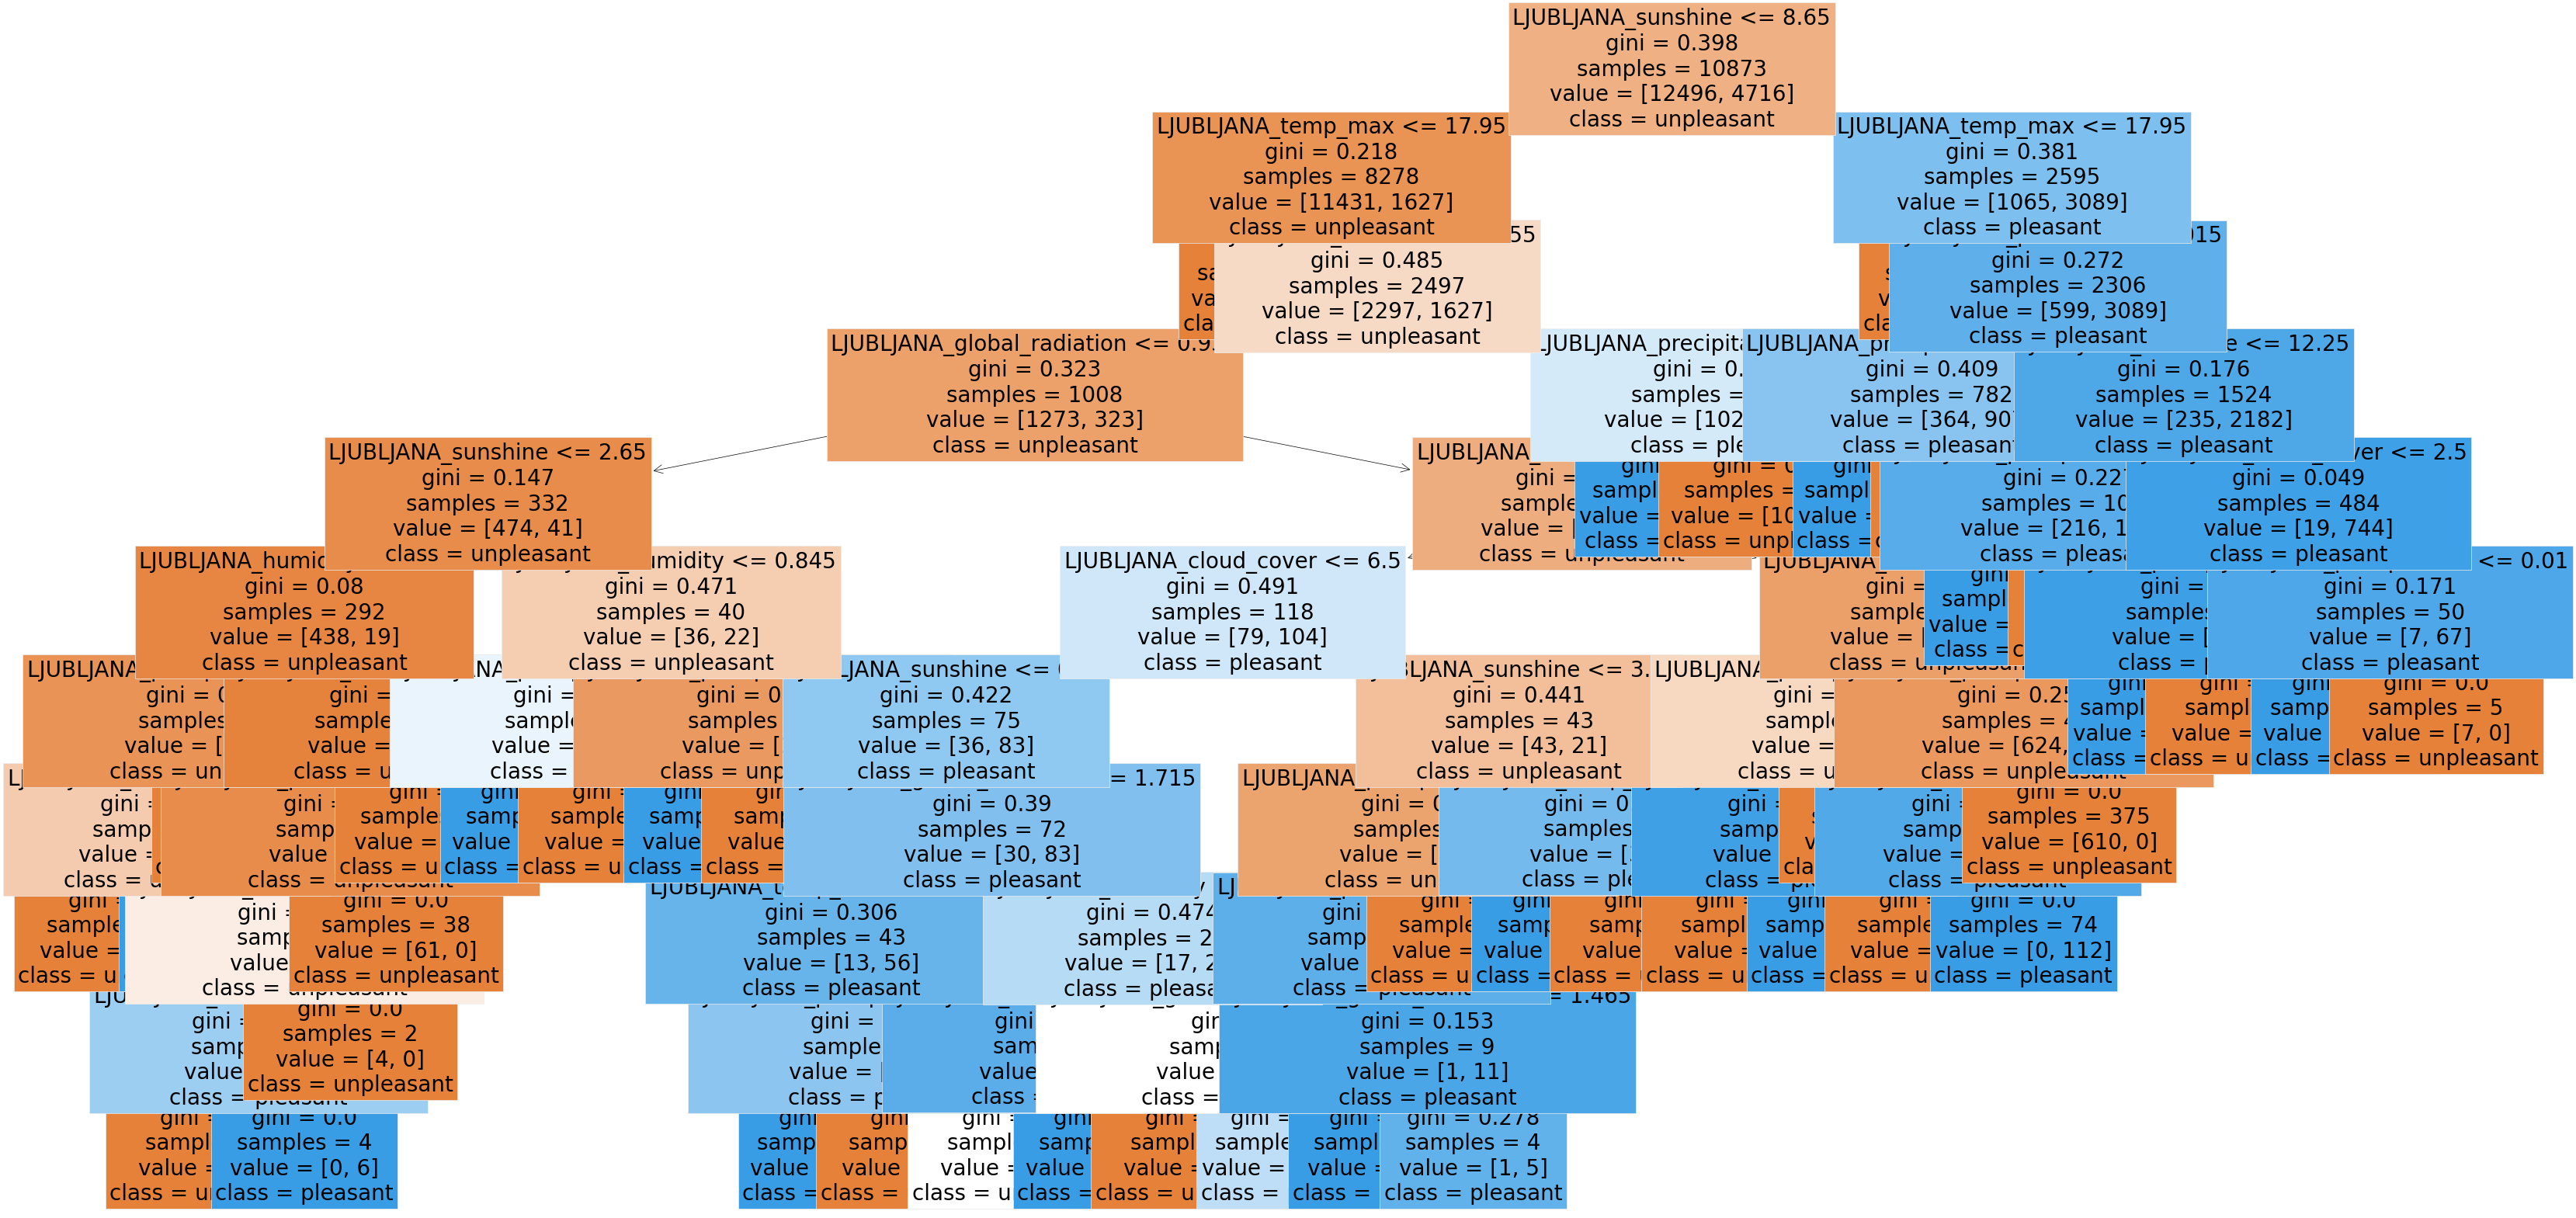

In [58]:
# Plot random forest (Ljubljana)
rf_3 = plt.figure(figsize=(40,20))
plot_tree(clf_3.estimators_[5], fontsize = 20, feature_names=df_ljubljana.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

#### Feature Importances for Ljubljana

In [60]:
# Retrieve feature importances from the trained model
feature_importances_3 = clf_3.feature_importances_
print("Feature Importances:", feature_importances_3)
print(feature_importances_3.shape)

Feature Importances: [0.03956718 0.02380327 0.00925481 0.08491603 0.34157255 0.11104722
 0.10510111 0.01379371 0.27094412]
(9,)


In [61]:
# Create a dataframe to associate observation measurements with their importances
importances_df_3 = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importances_3
})

In [62]:
# Sort by importance for chart readability
importances_df_3 = importances_df_3.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importances_df_3)

Feature Importance:
        Measurement  Importance
4     precipitation    0.341573
8          temp_max    0.270944
5          sunshine    0.111047
6         temp_mean    0.105101
3  global_radiation    0.084916
0       cloud_cover    0.039567
1          humidity    0.023803
7          temp_min    0.013794
2          pressure    0.009255


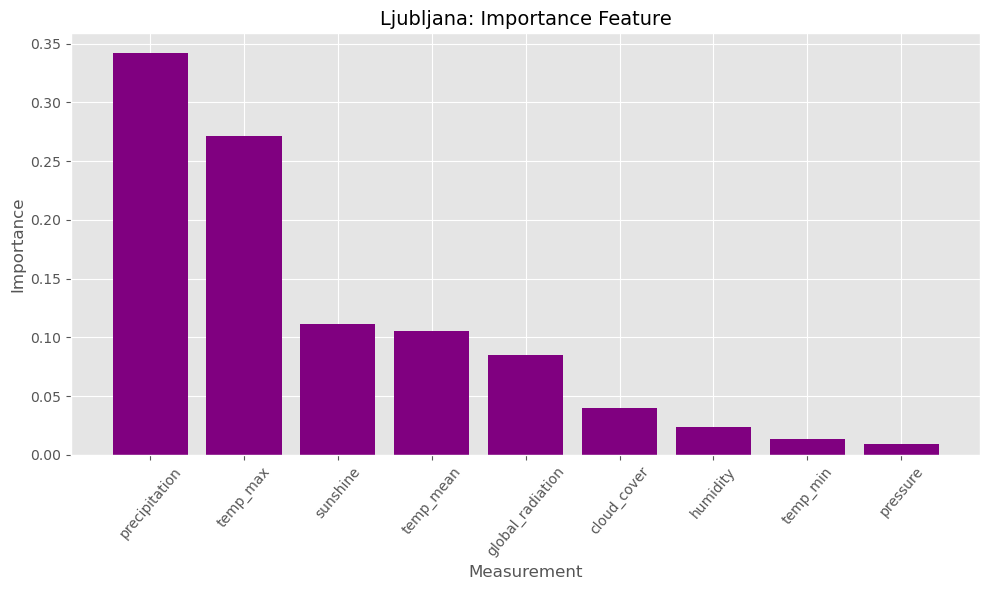

In [63]:
# Plot the importances

plt.style.use('ggplot')
plt_3 = plt.figure(figsize=(10, 6))
plt.bar(importances_df_3['Measurement'], importances_df_3['Importance'], color='purple')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Ljubljana: Importance Feature", fontsize=14)
plt.tight_layout()
plt.show()

## Random Forest Model for Budapest 

In [65]:
# Filter weather dataset to only include Budapest
df_budapest = climate_cleaned[climate_cleaned.columns[climate_cleaned.columns.astype(str).str.startswith('BUDAPEST')]]

# Check output
df_budapest.head()

BUDAPEST_cloud_cover  BUDAPEST_humidity  BUDAPEST_pressure  \
0                     4               0.67              1.017   
1                     4               0.67              1.017   
2                     4               0.67              1.017   
3                     4               0.67              1.017   
4                     4               0.67              1.017   

   BUDAPEST_global_radiation  BUDAPEST_precipitation  BUDAPEST_sunshine  \
0                       0.44                    0.01                2.3   
1                       0.18                    0.31                0.0   
2                       0.30                    0.00                0.6   
3                       0.19                    0.00                0.0   
4                       0.19                    0.00                0.0   

   BUDAPEST_temp_mean  BUDAPEST_temp_min  BUDAPEST_temp_max  
0                 2.4               -0.4                5.1  
1                 2.3                1.4                3.1  
2                 2.7                1.7                5.3  
3                 2.0                0.4                4.4  
4                 2.5                1.1                5.3

In [66]:
# Filter pleasant dataset to only include Budapest
pleasant_budapest = pleasant_weather[pleasant_weather.columns[pleasant_weather.columns.astype(str).str.startswith('BUDAPEST')]]

# Check output
pleasant_budapest.head()

BUDAPEST_pleasant_weather
0                          0
1                          0
2                          0
3                          0
4                          0

In [67]:
# Check shape
print(df_budapest.shape)
print(pleasant_budapest.shape)

(22950, 9)
(22950, 1)


In [68]:
# Create matrices
y_4 = pleasant_budapest.max(axis=1)

# Check shape
print("Shape of y_4_combined:", y_4.shape)

Shape of y_4_combined: (22950,)


In [69]:
# Create X matrix
X_4 = df_budapest.to_numpy()

# Check shapes of the matrices
print(X_4.shape)
print(y_4.shape)

(22950, 9)
(22950,)


In [70]:
# Split data into training and testing sets
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, random_state=127)

# Check shapes
print(X_train_4.shape, y_train_4.shape)
print(X_test_4.shape, y_test_4.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [71]:
# Creating a Random Forest classifier
clf_4 = RandomForestClassifier(n_estimators = 100, max_depth=10)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_4.fit(X_train_4, y_train_4)

RandomForestClassifier(max_depth=10)

In [72]:
# Perform the predictions on the test dataset
y_pred_4 = clf_4.predict(X_test_4)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test_4, y_pred_4))

Model Accuracy:  1.0


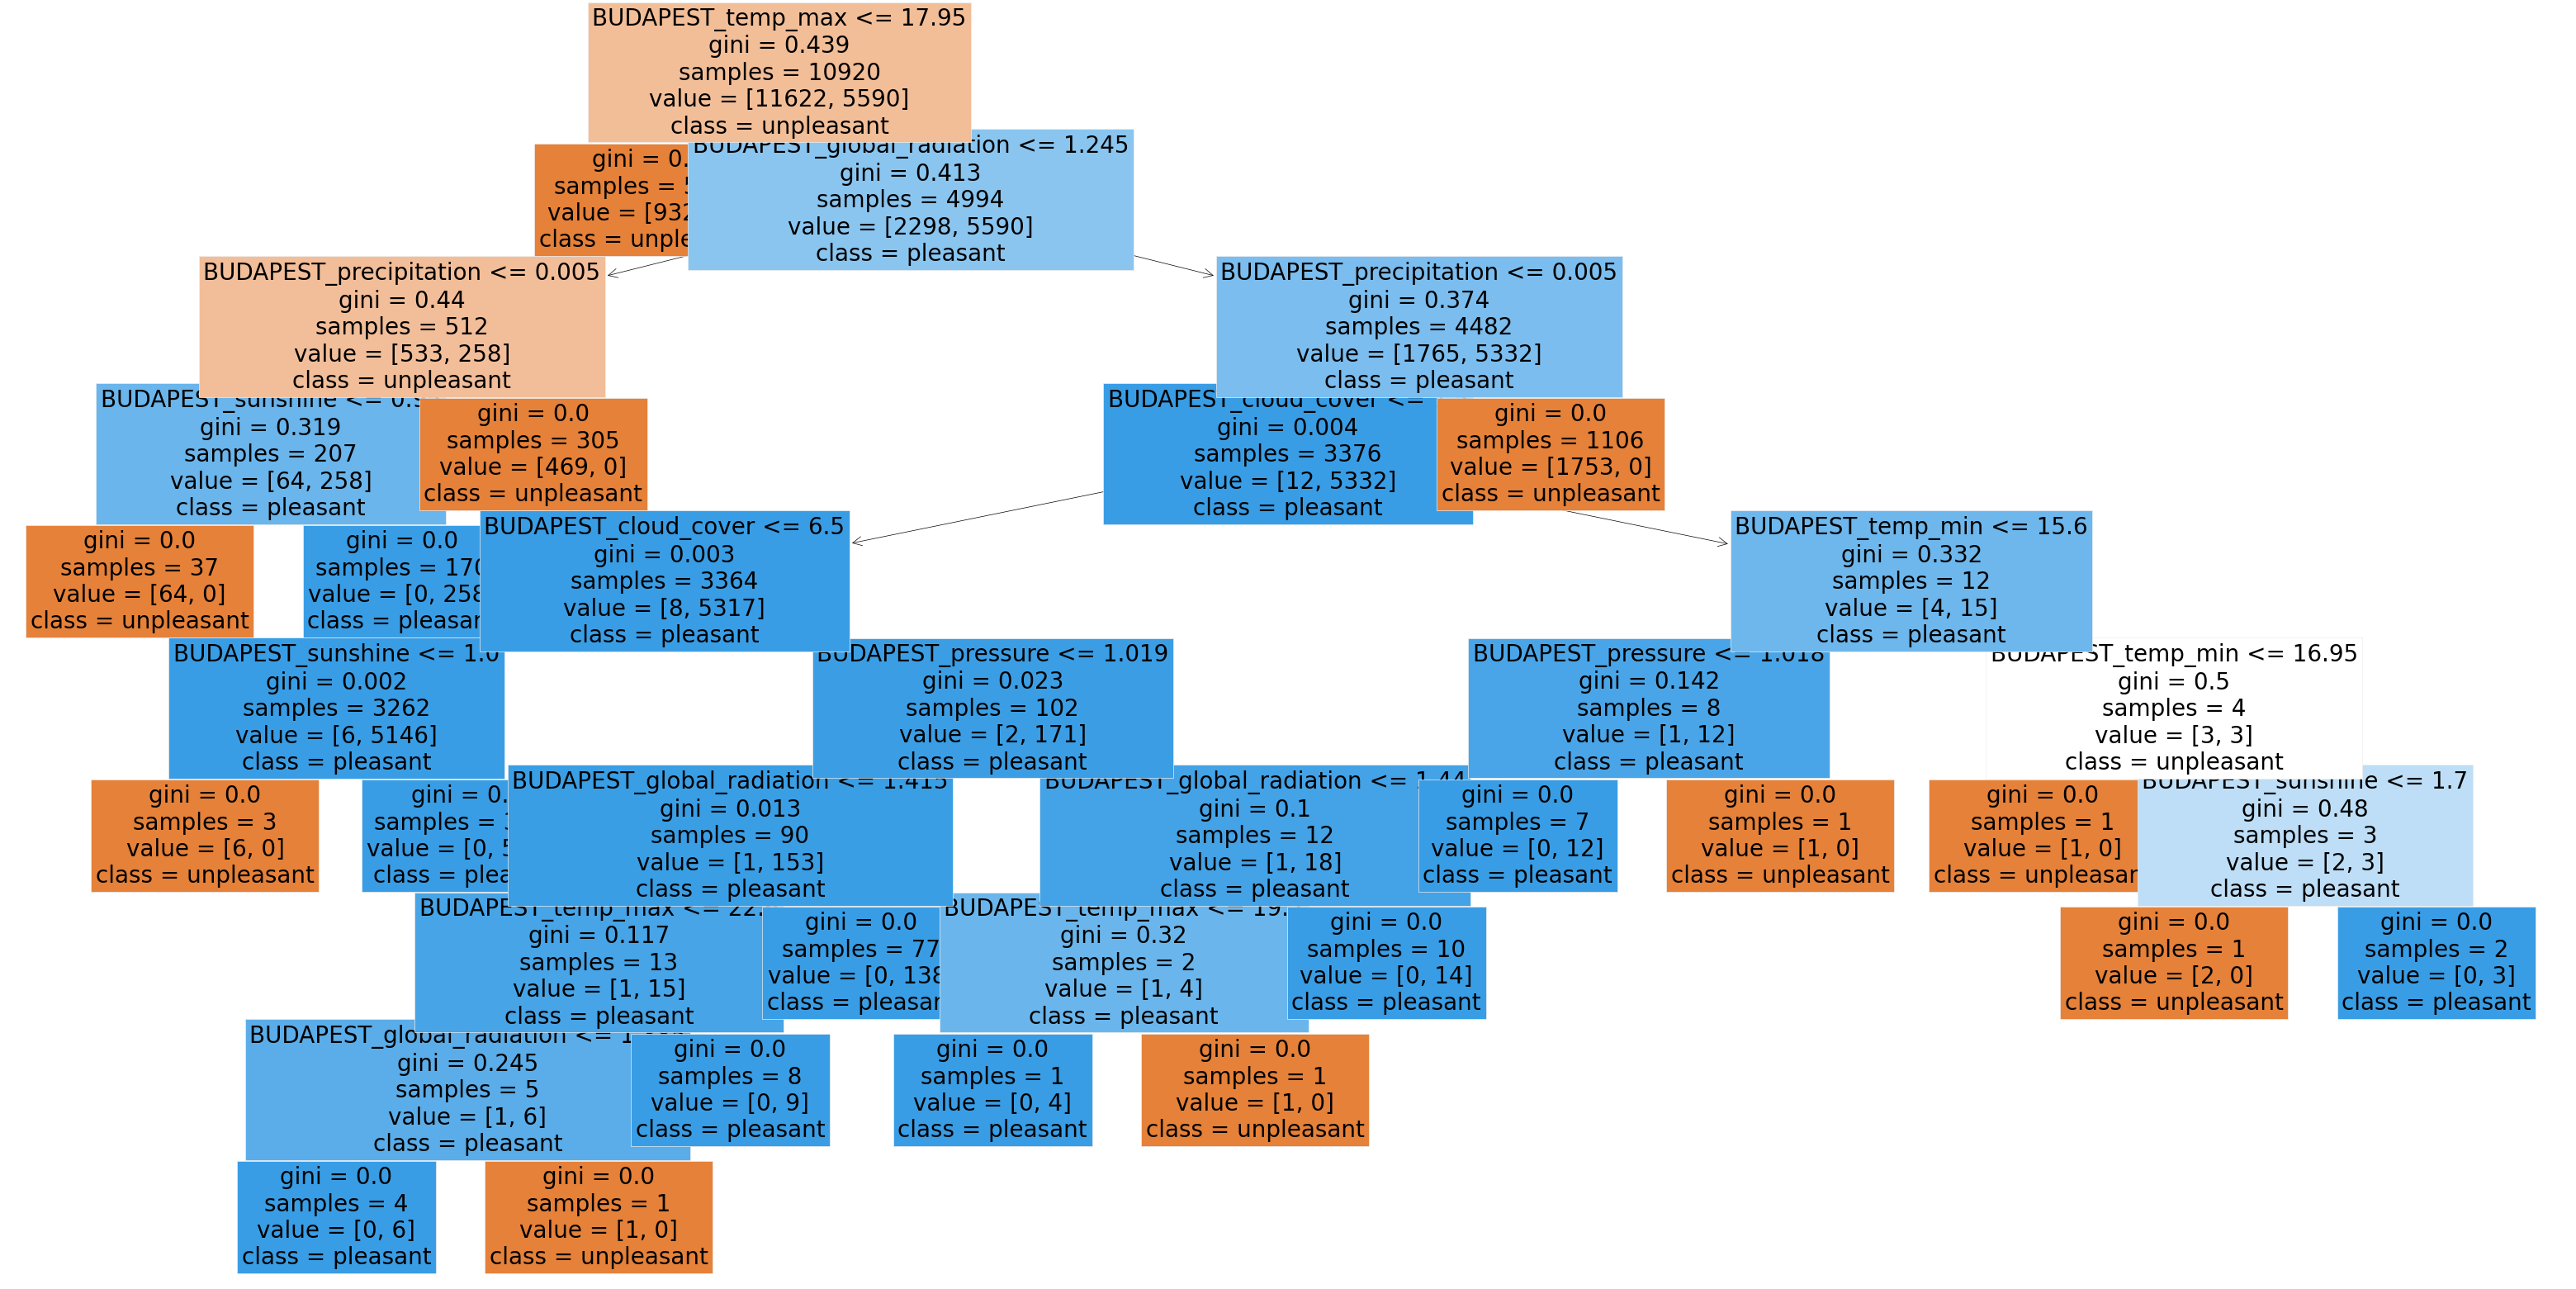

In [73]:
# Plot random forest (Ljubljana)
rf_4 = plt.figure(figsize=(40,20))
plot_tree(clf_4.estimators_[5], fontsize = 20, feature_names=df_budapest.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

#### Feature Importance for Budapest

In [75]:
# Retrieve feature importances from the trained model
feature_importances_4 = clf_4.feature_importances_
print("Feature Importances:", feature_importances_4)
print(feature_importances_4.shape)

Feature Importances: [0.01320827 0.00586042 0.00390506 0.03285735 0.3510096  0.06456309
 0.14317915 0.08271831 0.30269875]
(9,)


In [76]:
# Create a dataframe to associate observation measurements with their importances
importances_df_4 = pd.DataFrame({
    'Measurement': measurements,
    'Importance': feature_importances_4
})

In [77]:
# Sort by importance for chart readability
importances_df_4 = importances_df_4.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importances_df_4)

Feature Importance:
        Measurement  Importance
4     precipitation    0.351010
8          temp_max    0.302699
6         temp_mean    0.143179
7          temp_min    0.082718
5          sunshine    0.064563
3  global_radiation    0.032857
0       cloud_cover    0.013208
1          humidity    0.005860
2          pressure    0.003905


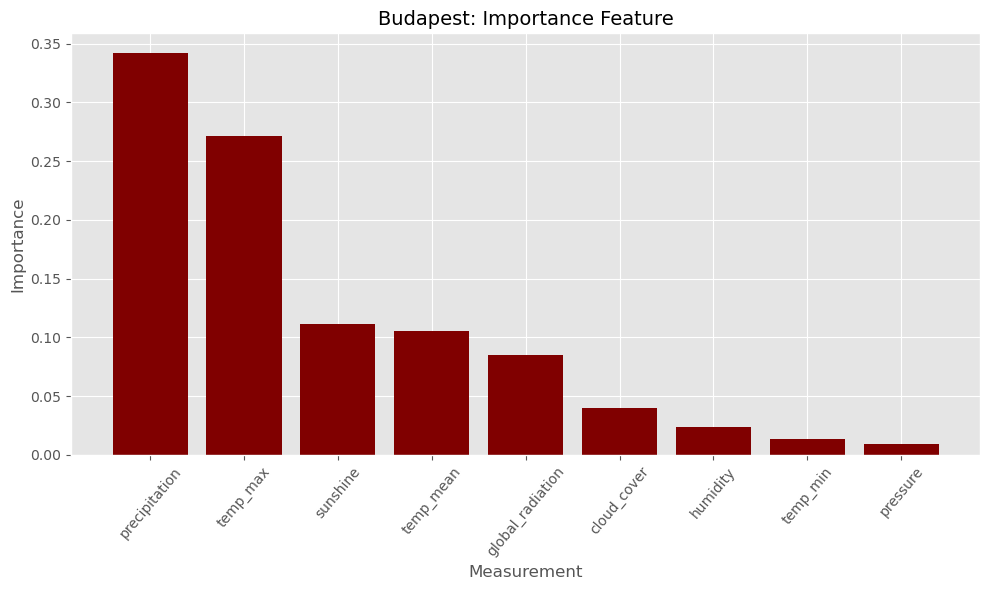

In [78]:
# Plot the importances

plt.style.use('ggplot')
plt_4 = plt.figure(figsize=(10, 6))
plt.bar(importances_df_3['Measurement'], importances_df_3['Importance'], color='maroon')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Budapest: Importance Feature", fontsize=14)
plt.tight_layout()
plt.show()